# MODELS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
import pickle
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    classification_report,
    confusion_matrix,
    plot_confusion_matrix,
    plot_precision_recall_curve,
    plot_roc_curve,
)
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
from sklearn.preprocessing import MinMaxScaler
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import re
import preprocessor as pproc
from cleantext import clean
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

In [2]:
with open("serialized/data.pkl", "rb") as f:
    data = pickle.load(f)

## 1. ORIGINAL DATASET

In [3]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['lemmatized'])
y = data["label"]
X.shape

(10570, 12418)

In [4]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [5]:
# Multinomial Naive Bayes
mnb_o = MultinomialNB(alpha=0.01)
mnb_o.fit(X_train_o, y_train_o)
y_mnb_o = mnb_o.predict(X_test_o)
as_mnb_o = accuracy_score(y_test_o, y_mnb_o)
f1s_mnb_o = f1_score(y_test_o, y_mnb_o, average= "macro")
prec_mnb_o = precision_score(y_test_o, y_mnb_o)
rec_mnb_o = recall_score(y_test_o, y_mnb_o, average='macro')
print("\nMultinomial Naive Bayes - Original dataset\n")
#plot_confusion_matrix(mnb_o, X_test_o ,y_test_o, cmap= "Blues")
print(confusion_matrix(y_test_o,y_mnb_o))
print(classification_report(y_test_o,y_mnb_o))
print(accuracy_score(y_test_o, y_mnb_o))


Multinomial Naive Bayes - Original dataset

[[2697  115]
 [ 283   76]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2812
           1       0.40      0.21      0.28       359

    accuracy                           0.87      3171
   macro avg       0.65      0.59      0.60      3171
weighted avg       0.85      0.87      0.86      3171

0.8744875433617155


In [6]:
# Support Vector Machine
svc_o = SVC(verbose=10, random_state=42)
svc_o.fit(X_train_o, y_train_o)
y_svc_o = svc_o.predict(X_test_o)
as_svc_o = accuracy_score(y_test_o, y_svc_o)
f1s_svc_o = f1_score(y_test_o, y_svc_o, average="macro")
prec_svc_o = precision_score(y_test_o, y_svc_o)
rec_svc_o = recall_score(y_test_o, y_svc_o, average='macro')
print("\nSupport Vector Machine - Original dataset\n")
#plot_confusion_matrix(svc_o, X_test_o ,y_test_o, cmap="Blues")
print(confusion_matrix(y_test_o,y_svc_o))
print(classification_report(y_test_o,y_svc_o))
print(accuracy_score(y_test_o, y_svc_o))

[LibSVM]
Support Vector Machine - Original dataset

[[2812    0]
 [ 352    7]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2812
           1       1.00      0.02      0.04       359

    accuracy                           0.89      3171
   macro avg       0.94      0.51      0.49      3171
weighted avg       0.90      0.89      0.84      3171

0.8889940081993062


In [7]:
# Logistic
log_fit_o = LogisticRegression(random_state=42).fit(X_train_o, y_train_o)
y_log_o = log_fit_o.predict(X_test_o)
as_log_o = accuracy_score(y_test_o, y_log_o)
f1s_log_o = f1_score(y_test_o, y_log_o, average= "macro")
prec_log_o = precision_score(y_test_o, y_log_o)
rec_log_o = recall_score(y_test_o, y_log_o, average='macro')
print("\nLogistic Regression - Original dataset\n")
#plot_confusion_matrix(log_fit_o, X_test_o ,y_test_o, cmap="Blues")
print(confusion_matrix(y_test_o,y_log_o))
print(classification_report(y_test_o,y_log_o))
print(accuracy_score(y_test_o, y_log_o))


Logistic Regression - Original dataset

[[2809    3]
 [ 344   15]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2812
           1       0.83      0.04      0.08       359

    accuracy                           0.89      3171
   macro avg       0.86      0.52      0.51      3171
weighted avg       0.88      0.89      0.84      3171

0.890570797855566


In [8]:
# Random Forest
rf_o = RandomForestClassifier(n_estimators=10, random_state=42)
rf_o.fit(X_train_o, y_train_o) 
y_rf_o = rf_o.predict(X_test_o)
as_rf_o = accuracy_score(y_test_o, y_rf_o)
f1s_rf_o = f1_score(y_test_o, y_rf_o, average= "macro")
prec_rf_o = precision_score(y_test_o, y_rf_o)
rec_rf_o = recall_score(y_test_o, y_rf_o, average='macro')
print("\nRandom Forest - Original dataset\n")
#plot_confusion_matrix(rf_o, X_test_o,y_test_o, cmap="Blues")
print(confusion_matrix(y_test_o,y_rf_o))
print(classification_report(y_test_o,y_rf_o))
print(accuracy_score(y_test_o, y_rf_o))


Random Forest - Original dataset

[[2811    1]
 [ 346   13]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2812
           1       0.93      0.04      0.07       359

    accuracy                           0.89      3171
   macro avg       0.91      0.52      0.51      3171
weighted avg       0.89      0.89      0.84      3171

0.890570797855566


In [9]:
# Decision Tree
tree_o = DecisionTreeClassifier(random_state=42)
tree_o.fit(X_train_o, y_train_o)
y_tree_o = tree_o.predict(X_test_o)
as_tree_o = accuracy_score(y_test_o, y_tree_o)
f1s_tree_o = f1_score(y_test_o, y_tree_o, average= "macro")
prec_tree_o = precision_score(y_test_o, y_tree_o)
rec_tree_o = recall_score(y_test_o, y_tree_o, average='macro')
print("\nDecision Tree - Original dataset\n")
#plot_confusion_matrix(tree_o, X_test_o,y_test_o, cmap="Blues")
print(confusion_matrix(y_test_o, y_tree_o))
print(classification_report(y_test_o, y_tree_o))
print(accuracy_score(y_test_o, y_tree_o))


Decision Tree - Original dataset

[[2613  199]
 [ 245  114]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2812
           1       0.36      0.32      0.34       359

    accuracy                           0.86      3171
   macro avg       0.64      0.62      0.63      3171
weighted avg       0.85      0.86      0.86      3171

0.8599810785241249


In [10]:
s1 = pd.Series([as_mnb_o, as_svc_o, as_log_o, as_rf_o, as_tree_o], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s2 = pd.Series([f1s_mnb_o, f1s_svc_o, f1s_log_o, f1s_rf_o, f1s_tree_o], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s3 = pd.Series([prec_mnb_o, prec_svc_o, prec_log_o, prec_rf_o, prec_tree_o], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s4 = pd.Series([rec_mnb_o, rec_svc_o, rec_log_o, rec_rf_o, rec_tree_o], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
d = {'Accuracy Score' : s1, 'Precision Score': s3, 'Recall Score' : s4, 'F1 Score' : s2 }
dfm = pd.DataFrame(d)
print("\nOriginal dataset\n")
dfm.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'tomato', axis = 0)


Original dataset



,Accuracy Score,Precision Score,Recall Score,F1 Score
Multinomial Naive Bayes,0.874488,0.397906,0.585402,0.603824
Support Vector Machine,0.888994,1.000000,0.509749,0.489675
Logistic Regression,0.890571,0.833333,0.520358,0.510701
Random Forest,0.890571,0.928571,0.517928,0.505786
Decision Tree,0.859981,0.364217,0.623390,0.630489


## 2. BALANCED DATASET

## 2.1 Under Sample

In [11]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)

In [12]:
X_under, y_under = undersample.fit_resample(X, y)
print(Counter(y_under))

Counter({0: 1196, 1: 1196})


In [13]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_under, y_under, test_size=0.3, random_state=42, stratify=y_under)


Multinomoial Naive Bayes - Balanced Under dataset

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       359
           1       0.69      0.79      0.73       359

    accuracy                           0.71       718
   macro avg       0.72      0.71      0.71       718
weighted avg       0.72      0.71      0.71       718

0.7144846796657381


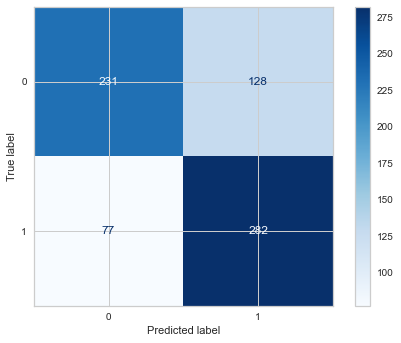

In [14]:
# Multinomial Naive Bayes
mnb_i = MultinomialNB(alpha=0.01)
mnb_i.fit(X_train_i, y_train_i)
y_mnb_i = mnb_i.predict(X_test_i)
as_mnb_i = accuracy_score(y_test_i, y_mnb_i)
f1s_mnb_i = f1_score(y_test_i, y_mnb_i, average= "macro")
prec_mnb_i = precision_score(y_test_i, y_mnb_i)
rec_mnb_i = recall_score(y_test_i, y_mnb_i, average='macro')
print("\nMultinomoial Naive Bayes - Balanced Under dataset\n")
plot_confusion_matrix(mnb_i, X_test_i,y_test_i, cmap = "Blues")
#print(confusion_matrix(y_test_i,y_mnb_i))
print(classification_report(y_test_i, y_mnb_i))
print(accuracy_score(y_test_i, y_mnb_i))

[LibSVM]
Support Vector Machine - Balanced Under dataset

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       359
           1       0.77      0.71      0.74       359

    accuracy                           0.75       718
   macro avg       0.75      0.75      0.75       718
weighted avg       0.75      0.75      0.75       718

0.7493036211699164


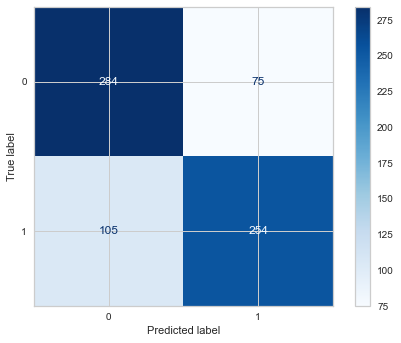

In [15]:
# Support Vector Machine
svc_i = SVC(verbose=10, random_state=42)
svc_i.fit(X_train_i, y_train_i)
y_svc_i = svc_i.predict(X_test_i)
as_svc_i = accuracy_score(y_test_i, y_svc_i)
f1s_svc_i = f1_score(y_test_i, y_svc_i, average="macro")
prec_svc_i = precision_score(y_test_i, y_svc_i)
rec_svc_i = recall_score(y_test_i, y_svc_i, average='macro')
print("\nSupport Vector Machine - Balanced Under dataset\n")
plot_confusion_matrix(svc_i, X_test_i, y_test_i, cmap="Blues")
#print(confusion_matrix(y_test_i, y_svc_i))
print(classification_report(y_test_i, y_svc_i))
print(accuracy_score(y_test_i, y_svc_i))


Logistic Regression - Balanced Under dataset

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       359
           1       0.79      0.70      0.74       359

    accuracy                           0.75       718
   macro avg       0.76      0.75      0.75       718
weighted avg       0.76      0.75      0.75       718

0.754874651810585


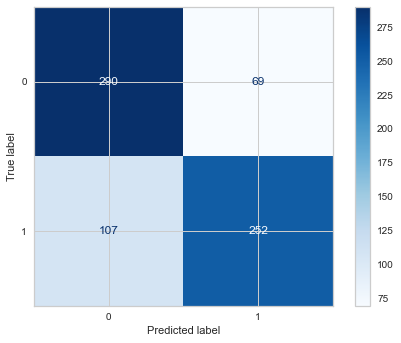

In [16]:
# Logistic
log_fit_i = LogisticRegression(random_state=42).fit(X_train_i, y_train_i)
y_log_i = log_fit_i.predict(X_test_i)
as_log_i = accuracy_score(y_test_i, y_log_i)
f1s_log_i = f1_score(y_test_i, y_log_i, average= "macro")
prec_log_i = precision_score(y_test_i, y_log_i)
rec_log_i = recall_score(y_test_i, y_log_i, average='macro')
print("\nLogistic Regression - Balanced Under dataset\n")
plot_confusion_matrix(log_fit_i, X_test_i, y_test_i, cmap="Blues")
#print(confusion_matrix(y_test_i, y_log_i))
print(classification_report(y_test_i, y_log_i))
print(accuracy_score(y_test_i, y_log_i))


Random Forest - Balanced Under dataset

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       359
           1       0.72      0.55      0.62       359

    accuracy                           0.67       718
   macro avg       0.68      0.67      0.66       718
weighted avg       0.68      0.67      0.66       718

0.6671309192200557


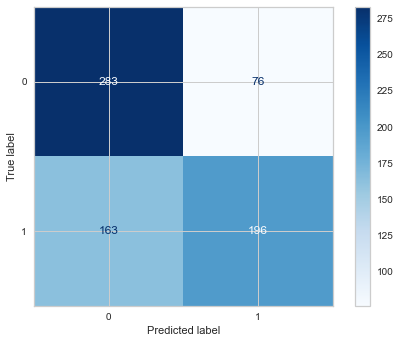

In [17]:
# Random Forest
rf_i = RandomForestClassifier(n_estimators=10, random_state=42)
rf_i.fit(X_train_i, y_train_i) 
y_rf_i = rf_i.predict(X_test_i)
as_rf_i = accuracy_score(y_test_i, y_rf_i)
f1s_rf_i = f1_score(y_test_i, y_rf_i, average= "macro")
prec_rf_i = precision_score(y_test_i, y_rf_i)
rec_rf_i = recall_score(y_test_i, y_rf_i, average='macro')
print("\nRandom Forest - Balanced Under dataset\n")
plot_confusion_matrix(rf_i, X_test_i, y_test_i, cmap="Blues")
#print(confusion_matrix(y_test_i, y_rf_i))
print(classification_report(y_test_i, y_rf_i))
print(accuracy_score(y_test_i, y_rf_i))


Decision Tree - Balanced Under dataset

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       359
           1       0.65      0.57      0.61       359

    accuracy                           0.63       718
   macro avg       0.63      0.63      0.63       718
weighted avg       0.63      0.63      0.63       718

0.6309192200557103


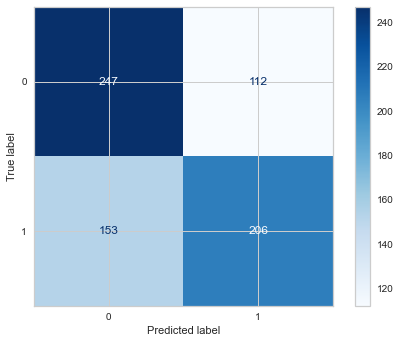

In [18]:
# Decision Tree
tree_i = DecisionTreeClassifier(random_state=42)
tree_i.fit(X_train_i, y_train_i)
y_tree_i = tree_i.predict(X_test_i)
as_tree_i = accuracy_score(y_test_i, y_tree_i)
f1s_tree_i = f1_score(y_test_i, y_tree_i, average= "macro")
prec_tree_i = precision_score(y_test_i, y_tree_i)
rec_tree_i = recall_score(y_test_i, y_tree_i, average='macro')
print("\nDecision Tree - Balanced Under dataset\n")
plot_confusion_matrix(tree_i, X_test_i, y_test_i, cmap="Blues")
#print(confusion_matrix(y_test_i, y_tree_i))
print(classification_report(y_test_i, y_tree_i))
print(accuracy_score(y_test_i, y_tree_i))

In [19]:
s1_i = pd.Series([as_mnb_i, as_svc_i, as_log_i, as_rf_i, as_tree_i], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s2_i = pd.Series([f1s_mnb_i, f1s_svc_i, f1s_log_i, f1s_rf_i, f1s_tree_i], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s3_i = pd.Series([prec_mnb_i, prec_svc_i, prec_log_i, prec_rf_i, prec_tree_i], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s4_i = pd.Series([rec_mnb_i, rec_svc_i, rec_log_i, rec_rf_i, rec_tree_i], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
d_i = {'Accuracy Score' : s1_i, 'Precision Score': s3_i, 'Recall Score' : s4_i, 'F1 Score' : s2_i}
dfm_i = pd.DataFrame(d_i)
print("\nBalanced Under dataset\n")
dfm_i.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'tomato', axis = 0)


Balanced Under dataset



,Accuracy Score,Precision Score,Recall Score,F1 Score
Multinomial Naive Bayes,0.714485,0.687805,0.714485,0.713037
Support Vector Machine,0.749304,0.772036,0.749304,0.748865
Logistic Regression,0.754875,0.785047,0.754875,0.754186
Random Forest,0.667131,0.720588,0.667131,0.662171
Decision Tree,0.630919,0.647799,0.630919,0.629712


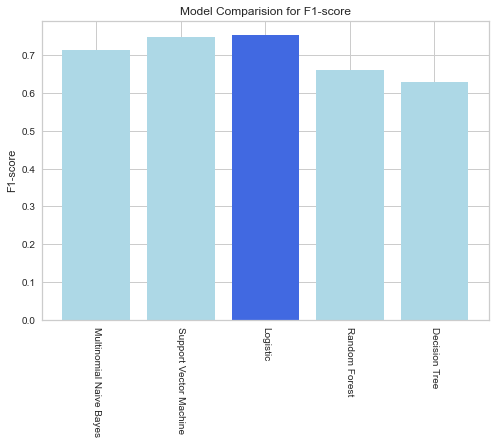

In [20]:
objects = ('Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic', 'Random Forest', 'Decision Tree')
y_pos = np.arange(len(objects))
performance_f1 = [f1s_mnb_i, f1s_svc_i, f1s_log_i, f1s_rf_i, f1s_tree_i]
clrs = ['lightblue' if (x < max(performance_f1)) else 'royalblue' for x in performance_f1 ]
plt.bar(y_pos, performance_f1, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('F1-score')
plt.title('Model Comparision for F1-score')
plt.show()

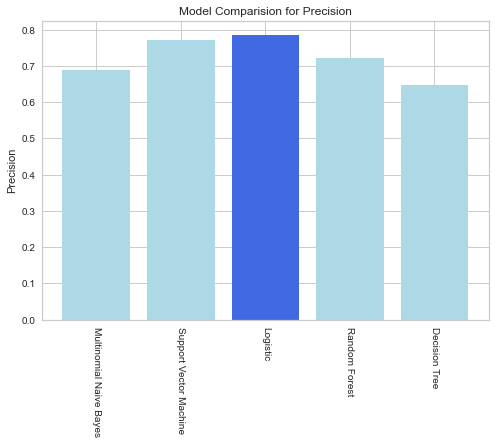

In [21]:
performance_prec = [prec_mnb_i, prec_svc_i, prec_log_i, prec_rf_i, prec_tree_i]
clrs = ['lightblue' if (x < max(performance_prec)) else 'royalblue' for x in performance_prec ]
plt.bar(y_pos, performance_prec, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('Precision')
plt.title('Model Comparision for Precision')
plt.show()

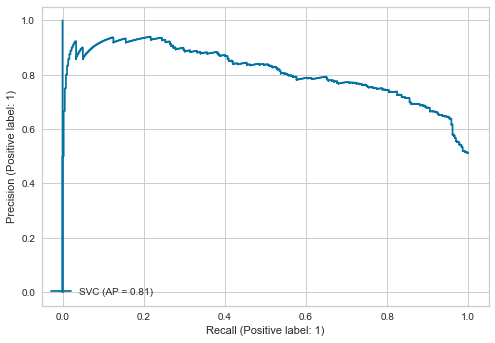

In [22]:
plot_precision_recall_curve(svc_i, X_test_i, y_test_i)

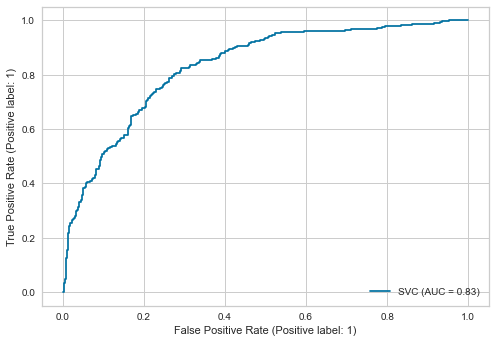

In [23]:
plot_roc_curve(svc_i,  X_test_i, y_test_i)

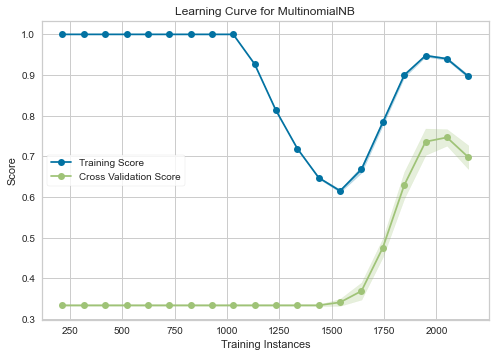

<AxesSubplot:title={'center':'Learning Curve for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [24]:
# Learning curve Under dataset
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.1, 1, 20 )

model = MultinomialNB()
visualizer = LearningCurve(model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4)

visualizer.fit(X_under, y_under)
visualizer.show()

In [25]:
with open("serialized/vect.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open("serialized/svc.pkl", "wb") as f:
    pickle.dump(svc_i, f)

## 2.2. Over Sample

In [26]:
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)

In [27]:
X_over, y_over = oversample.fit_resample(X, y)
print(Counter(y_over))

Counter({0: 9374, 1: 9374})


In [28]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_over, y_over, test_size=0.3, random_state=42, stratify=y_over)


Multinomoial Naive Bayes - Balanced Over dataset

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2813
           1       0.82      0.97      0.89      2812

    accuracy                           0.88      5625
   macro avg       0.89      0.88      0.88      5625
weighted avg       0.89      0.88      0.88      5625

0.8778666666666667


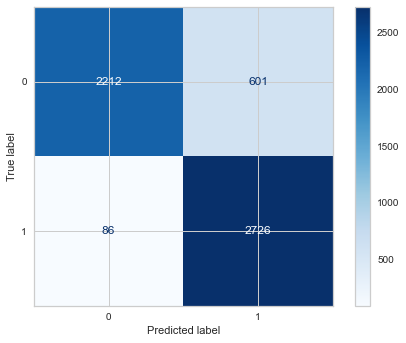

In [29]:
# Multinomial Naive Bayes
mnb_s = MultinomialNB(alpha=0.01)
mnb_s.fit(X_train_s, y_train_s)
y_mnb_s = mnb_s.predict(X_test_s)
as_mnb_s = accuracy_score(y_test_s, y_mnb_s)
f1s_mnb_s = f1_score(y_test_s, y_mnb_s, average= "macro")
prec_mnb_s = precision_score(y_test_s, y_mnb_s)
rec_mnb_s = recall_score(y_test_s, y_mnb_s, average='macro')
print("\nMultinomoial Naive Bayes - Balanced Over dataset\n")
plot_confusion_matrix(mnb_s, X_test_s,y_test_s, cmap = "Blues")
#print(confusion_matrix(y_test_s,y_mnb_s))
print(classification_report(y_test_s, y_mnb_s))
print(accuracy_score(y_test_s, y_mnb_s))

[LibSVM]
Support Vector Machine - Balanced Over dataset

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2813
           1       0.98      0.99      0.99      2812

    accuracy                           0.99      5625
   macro avg       0.99      0.99      0.99      5625
weighted avg       0.99      0.99      0.99      5625

0.9857777777777778


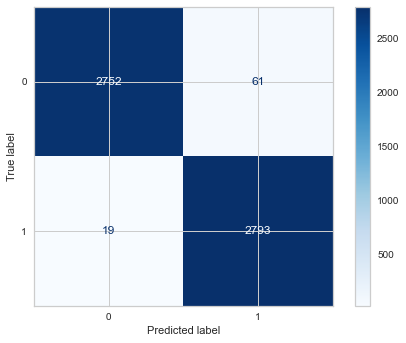

In [30]:
# Support Vector Machine
svc_s = SVC(verbose=10, random_state=42)
svc_s.fit(X_train_s, y_train_s)
y_svc_s = svc_s.predict(X_test_s)
as_svc_s = accuracy_score(y_test_s, y_svc_s)
f1s_svc_s = f1_score(y_test_s, y_svc_s, average="macro")
prec_svc_s = precision_score(y_test_s, y_svc_s)
rec_svc_s = recall_score(y_test_s, y_svc_s, average='macro')
print("\nSupport Vector Machine - Balanced Over dataset\n")
plot_confusion_matrix(svc_s, X_test_s, y_test_s, cmap="Blues")
#print(confusion_matrix(y_test_s, y_svc_s))
print(classification_report(y_test_s, y_svc_s))
print(accuracy_score(y_test_s, y_svc_s))


Logistic Regression - Balanced Over dataset

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2813
           1       0.88      0.95      0.91      2812

    accuracy                           0.91      5625
   macro avg       0.91      0.91      0.91      5625
weighted avg       0.91      0.91      0.91      5625

0.9116444444444445


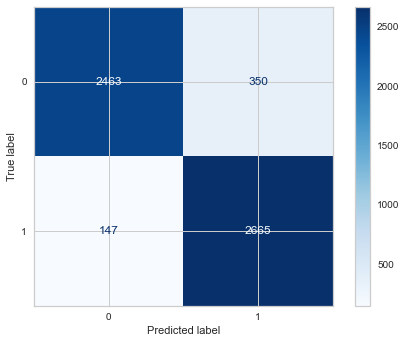

In [31]:
# Logistic
log_fit_s = LogisticRegression(random_state=42).fit(X_train_s, y_train_s)
y_log_s = log_fit_s.predict(X_test_s)
as_log_s = accuracy_score(y_test_s, y_log_s)
f1s_log_s = f1_score(y_test_s, y_log_s, average= "macro")
prec_log_s = precision_score(y_test_s, y_log_s)
rec_log_s = recall_score(y_test_s, y_log_s, average='macro')
print("\nLogistic Regression - Balanced Over dataset\n")
plot_confusion_matrix(log_fit_s, X_test_s, y_test_s, cmap="Blues")
#print(confusion_matrix(y_test_s, y_log_s))
print(classification_report(y_test_s, y_log_s))
print(accuracy_score(y_test_s, y_log_s))


Random Forest - Balanced Over dataset

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2813
           1       0.98      0.99      0.99      2812

    accuracy                           0.99      5625
   macro avg       0.99      0.99      0.99      5625
weighted avg       0.99      0.99      0.99      5625

0.9859555555555556


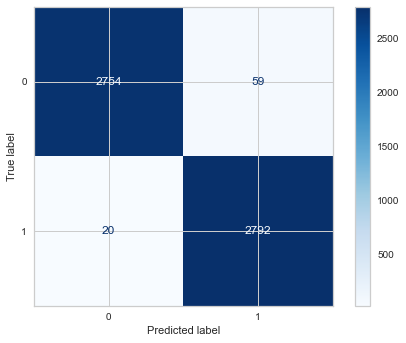

In [32]:
# Random Forest
rf_s = RandomForestClassifier(n_estimators=10, random_state=42)
rf_s.fit(X_train_s, y_train_s) 
y_rf_s = rf_s.predict(X_test_s)
as_rf_s = accuracy_score(y_test_s, y_rf_s)
f1s_rf_s = f1_score(y_test_s, y_rf_s, average= "macro")
prec_rf_s = precision_score(y_test_s, y_rf_s)
rec_rf_s = recall_score(y_test_s, y_rf_s, average='macro')
print("\nRandom Forest - Balanced Over dataset\n")
plot_confusion_matrix(rf_s, X_test_s, y_test_s, cmap="Blues")
#print(confusion_matrix(y_test_s, y_rf_s))
print(classification_report(y_test_s, y_rf_s))
print(accuracy_score(y_test_s, y_rf_s))


Decision Tree - Balanced Over dataset

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2813
           1       0.88      0.99      0.93      2812

    accuracy                           0.93      5625
   macro avg       0.94      0.93      0.93      5625
weighted avg       0.94      0.93      0.93      5625

0.9272888888888889


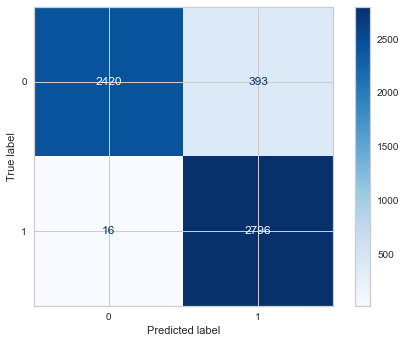

In [33]:
# Decision Tree
tree_s = DecisionTreeClassifier(random_state=42)
tree_s.fit(X_train_s, y_train_s)
y_tree_s = tree_s.predict(X_test_s)
as_tree_s = accuracy_score(y_test_s, y_tree_s)
f1s_tree_s = f1_score(y_test_s, y_tree_s, average= "macro")
prec_tree_s = precision_score(y_test_s, y_tree_s)
rec_tree_s = recall_score(y_test_s, y_tree_s, average='macro')
print("\nDecision Tree - Balanced Over dataset\n")
plot_confusion_matrix(tree_s, X_test_s, y_test_s, cmap="Blues")
#print(confusion_matrix(y_test_s, y_tree_s))
print(classification_report(y_test_s, y_tree_s))
print(accuracy_score(y_test_s, y_tree_s))

In [34]:
s1_s = pd.Series([as_mnb_s, as_svc_s, as_log_s, as_rf_s, as_tree_s], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s2_s = pd.Series([f1s_mnb_s, f1s_svc_s, f1s_log_s, f1s_rf_s, f1s_tree_s], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s3_s = pd.Series([prec_mnb_s, prec_svc_s, prec_log_s, prec_rf_s, prec_tree_s], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s4_s = pd.Series([rec_mnb_s, rec_svc_s, rec_log_s, rec_rf_s, rec_tree_s], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
d_s = {'Accuracy Score' : s1_s, 'Precision Score': s3_s, 'Recall Score' : s4_s, 'F1 Score' : s2_s}
dfm_s = pd.DataFrame(d_s)
print("\nBalanced Over dataset\n")
dfm_s.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'tomato', axis = 0)


Balanced Over dataset



,Accuracy Score,Precision Score,Recall Score,F1 Score
Multinomial Naive Bayes,0.877867,0.819357,0.877883,0.876838
Support Vector Machine,0.985778,0.978626,0.985779,0.985777
Logistic Regression,0.911644,0.883914,0.911651,0.911530
Random Forest,0.985956,0.979306,0.985957,0.985955
Decision Tree,0.927289,0.876764,0.927301,0.926963


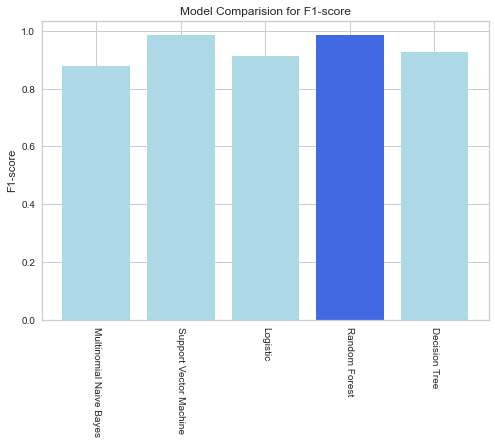

In [35]:
objects = ('Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic', 'Random Forest', 'Decision Tree')
y_pos = np.arange(len(objects))
performance_f1 = [f1s_mnb_s, f1s_svc_s, f1s_log_s, f1s_rf_s, f1s_tree_s]
clrs = ['lightblue' if (x < max(performance_f1)) else 'royalblue' for x in performance_f1 ]
plt.bar(y_pos, performance_f1, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('F1-score')
plt.title('Model Comparision for F1-score')
plt.show()

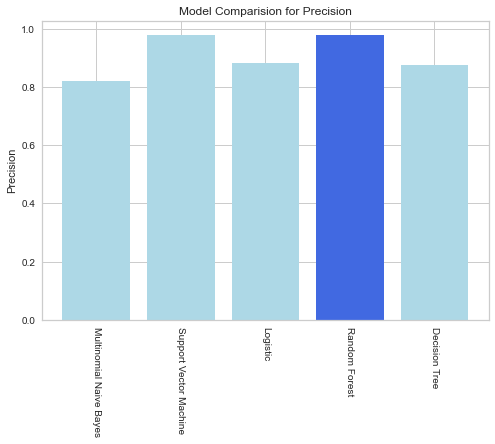

In [36]:
performance_prec = [prec_mnb_s, prec_svc_s, prec_log_s, prec_rf_s, prec_tree_s]
clrs = ['lightblue' if (x < max(performance_prec)) else 'royalblue' for x in performance_prec ]
plt.bar(y_pos, performance_prec, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('Precision')
plt.title('Model Comparision for Precision')
plt.show()

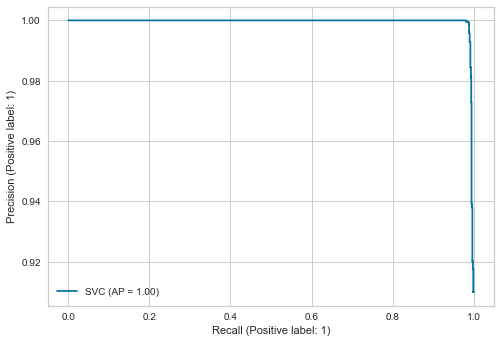

In [37]:
plot_precision_recall_curve(svc_s, X_test_s, y_test_s)

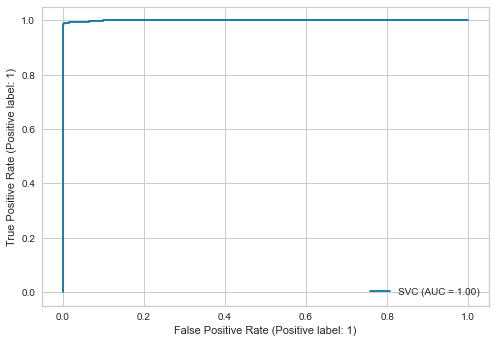

In [38]:
plot_roc_curve(svc_s,  X_test_s, y_test_s)

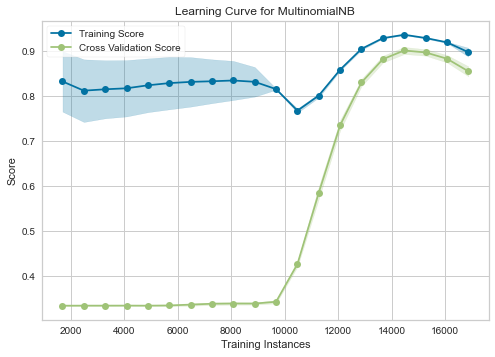

<AxesSubplot:title={'center':'Learning Curve for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [39]:
# Learning curve Over dataset
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.1, 1, 20 )

model = MultinomialNB()
visualizer = LearningCurve(model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4)

visualizer.fit(X_over, y_over)
visualizer.show()

## 3 MODELS ON POS

## 3.1 Nouns + Proper Nouns + Adjectives

In [40]:
def filter_text_pos(x):
    final_pos_text = []
    for elem in x:
        for pos in pos_list:
            if elem[1] == pos:
                final_pos_text.append(elem[0])
    
    return " ".join(final_pos_text)

In [41]:
pos_list = ["NOUN" , "PROPN" ,"ADJ" ]

In [42]:
data["NOUN_PROPN_ADJ"] = data.apply(lambda x: filter_text_pos(x["POS_spacy"]), axis=1)

In [43]:
tfidf_vectorizer_pos1 = TfidfVectorizer()

In [44]:
X_Propn = tfidf_vectorizer_pos1.fit_transform(data["NOUN_PROPN_ADJ"])
y_Propn = data["label"]

In [45]:
X_over_p, y_over_p = undersample.fit_resample(X_Propn, y_Propn)

In [46]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_over_p, y_over_p, test_size=0.3, random_state=42, stratify=y_over_p)


Multinomoial Naive Bayes - NOUN_PROPN_ADJ

              precision    recall  f1-score   support

           0       0.71      0.66      0.68       359
           1       0.68      0.73      0.70       359

    accuracy                           0.69       718
   macro avg       0.69      0.69      0.69       718
weighted avg       0.69      0.69      0.69       718

0.6935933147632312


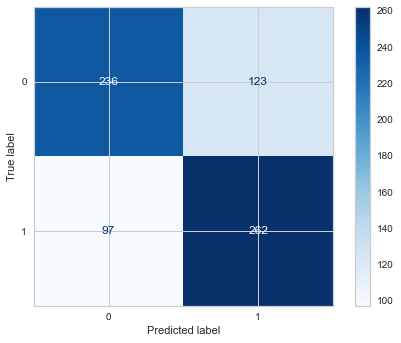

In [47]:
# Multinomial Naive Bayes
mnb_p = MultinomialNB(alpha=0.01)
mnb_p.fit(X_train_p, y_train_p)
y_mnb_p = mnb_p.predict(X_test_p)
as_mnb_p = accuracy_score(y_test_p, y_mnb_p)
f1s_mnb_p = f1_score(y_test_p, y_mnb_p, average= "macro")
prec_mnb_p = precision_score(y_test_p, y_mnb_p)
rec_mnb_p = recall_score(y_test_p, y_mnb_p, average='macro')
print("\nMultinomoial Naive Bayes - NOUN_PROPN_ADJ\n")
plot_confusion_matrix(mnb_p, X_test_p, y_test_p, cmap="Blues")
#print(confusion_matrix(y_test_p, y_mnb_p))
print(classification_report(y_test_p, y_mnb_p))
print(accuracy_score(y_test_p, y_mnb_p))

[LibSVM]
Support Vector Machine - NOUN_PROPN_ADJ

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       359
           1       0.79      0.66      0.72       359

    accuracy                           0.74       718
   macro avg       0.75      0.74      0.74       718
weighted avg       0.75      0.74      0.74       718

0.7437325905292479


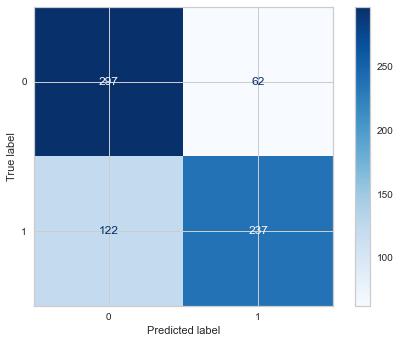

In [48]:
# Support Vector Machine
svc_p = SVC(verbose=10, random_state=42)
svc_p.fit(X_train_p, y_train_p)
y_svc_p = svc_p.predict(X_test_p)
as_svc_p = accuracy_score(y_test_p, y_svc_p)
f1s_svc_p = f1_score(y_test_p, y_svc_p, average="macro")
prec_svc_p = precision_score(y_test_p, y_svc_p)
rec_svc_p = recall_score(y_test_p, y_svc_p, average='macro')
print("\nSupport Vector Machine - NOUN_PROPN_ADJ\n")
plot_confusion_matrix(svc_p, X_test_p, y_test_p, cmap="Blues")
#print(confusion_matrix(y_test_p, y_svc_p))
print(classification_report(y_test_p, y_svc_p))
print(accuracy_score(y_test_p, y_svc_p))


Logistic Regression - NOUN_PROPN_ADJ

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       359
           1       0.81      0.64      0.71       359

    accuracy                           0.74       718
   macro avg       0.76      0.74      0.74       718
weighted avg       0.76      0.74      0.74       718

0.7437325905292479


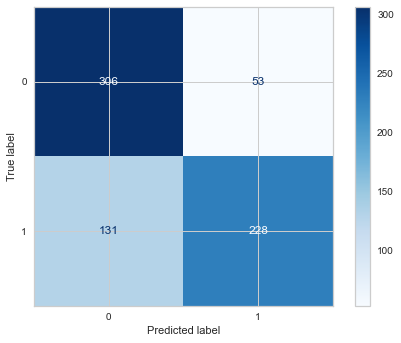

In [49]:
# Logistic
log_fit_p = LogisticRegression(random_state=42).fit(X_train_p, y_train_p)
y_log_p = log_fit_p.predict(X_test_p)
as_log_p = accuracy_score(y_test_p, y_log_p)
f1s_log_p = f1_score(y_test_p, y_log_p, average= "macro")
prec_log_p = precision_score(y_test_p, y_log_p)
rec_log_p = recall_score(y_test_p, y_log_p, average='macro')
print("\nLogistic Regression - NOUN_PROPN_ADJ\n")
plot_confusion_matrix(log_fit_p, X_test_p, y_test_p, cmap="Blues")
#print(confusion_matrix(y_test_p, y_log_p))
print(classification_report(y_test_p, y_log_p))
print(accuracy_score(y_test_p, y_log_p))


Random Forest - NOUN_PROPN_ADJ

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       359
           1       0.78      0.50      0.61       359

    accuracy                           0.68       718
   macro avg       0.71      0.68      0.67       718
weighted avg       0.71      0.68      0.67       718

0.6796657381615598


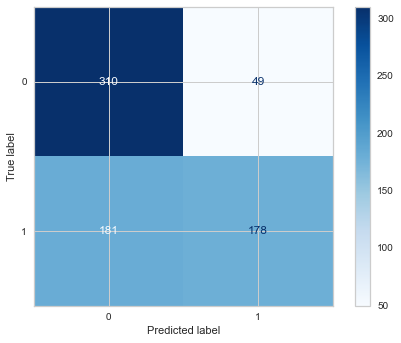

In [50]:
# Random Forest
rf_p = RandomForestClassifier(n_estimators=10, random_state=42)
rf_p.fit(X_train_p, y_train_p) 
y_rf_p = rf_p.predict(X_test_p)
as_rf_p = accuracy_score(y_test_p, y_rf_p)
f1s_rf_p = f1_score(y_test_p, y_rf_p, average= "macro")
prec_rf_p = precision_score(y_test_p, y_rf_p)
rec_rf_p = recall_score(y_test_p, y_rf_p, average='macro')
print("\nRandom Forest - NOUN_PROPN_ADJ\n")
plot_confusion_matrix(rf_p, X_test_p, y_test_p, cmap="Blues")
#print(confusion_matrix(y_test_p, y_rf_p))
print(classification_report(y_test_p, y_rf_p))
print(accuracy_score(y_test_p, y_rf_p))


Decision Tree - NOUN_PROPN_ADJ

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       359
           1       0.72      0.62      0.67       359

    accuracy                           0.69       718
   macro avg       0.70      0.69      0.69       718
weighted avg       0.70      0.69      0.69       718

0.6935933147632312


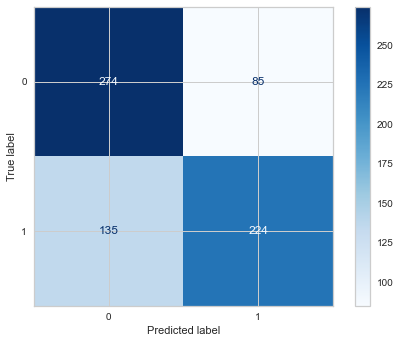

In [51]:
# Decision Tree
tree_p = DecisionTreeClassifier(random_state=42)
tree_p.fit(X_train_p, y_train_p)
y_tree_p = tree_p.predict(X_test_p)
as_tree_p = accuracy_score(y_test_p, y_tree_p)
f1s_tree_p = f1_score(y_test_p, y_tree_p, average= "macro")
prec_tree_p = precision_score(y_test_p, y_tree_p)
rec_tree_p = recall_score(y_test_p, y_tree_p, average='macro')
print("\nDecision Tree - NOUN_PROPN_ADJ\n")
plot_confusion_matrix(tree_p, X_test_p, y_test_p, cmap="Blues")
#print(confusion_matrix(y_test_p, y_tree_p))
print(classification_report(y_test_p, y_tree_p))
print(accuracy_score(y_test_p, y_tree_p))

In [52]:
s1_p = pd.Series([as_mnb_p, as_svc_p, as_log_p, as_rf_p, as_tree_p], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s2_p = pd.Series([f1s_mnb_p, f1s_svc_p, f1s_log_p, f1s_rf_p,  f1s_tree_p], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s3_p = pd.Series([prec_mnb_p, prec_svc_p, prec_log_p, prec_rf_p, prec_tree_p], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s4_p = pd.Series([rec_mnb_p, rec_svc_p, rec_log_p, rec_rf_p, rec_tree_p], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
d_p = {'Accuracy Score' : s1_p, 'Precision Score': s3_p, 'Recall Score' : s4_p, 'F1 Score' : s2_p}
dfm_p = pd.DataFrame(d_p)
print("\nNOUN_PROPN_ADJ\n")
dfm_p.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'tomato', axis = 0)


NOUN_PROPN_ADJ



,Accuracy Score,Precision Score,Recall Score,F1 Score
Multinomial Naive Bayes,0.693593,0.680519,0.693593,0.693191
Support Vector Machine,0.743733,0.792642,0.743733,0.741930
Logistic Regression,0.743733,0.811388,0.743733,0.740672
Random Forest,0.679666,0.784141,0.679666,0.668460
Decision Tree,0.693593,0.724919,0.693593,0.692100


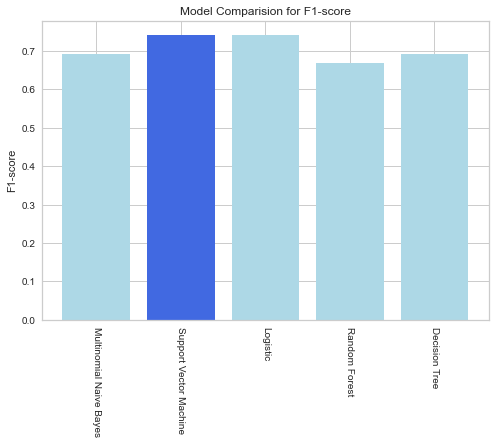

In [53]:
objects = ('Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic', 'Random Forest', 'Decision Tree')
y_pos = np.arange(len(objects))
performance_f1 = [f1s_mnb_p, f1s_svc_p, f1s_log_p, f1s_rf_p, f1s_tree_p]
clrs = ['lightblue' if (x < max(performance_f1)) else 'royalblue' for x in performance_f1 ]
plt.bar(y_pos, performance_f1, align='center',  color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('F1-score')
plt.title('Model Comparision for F1-score')
plt.show()

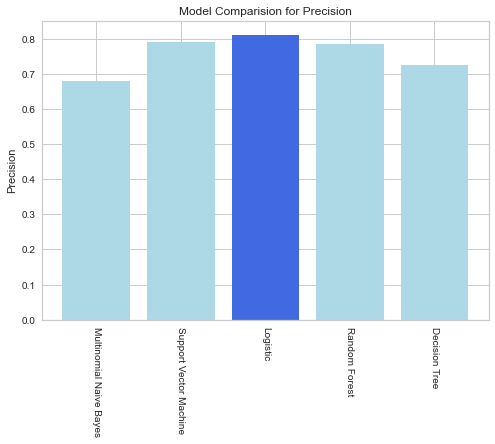

In [54]:
performance_prec = [prec_mnb_p, prec_svc_p, prec_log_p, prec_rf_p, prec_tree_p]
clrs = ['lightblue' if (x < max(performance_prec)) else 'royalblue' for x in performance_prec ]
plt.bar(y_pos, performance_prec, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('Precision')
plt.title('Model Comparision for Precision')
plt.show()

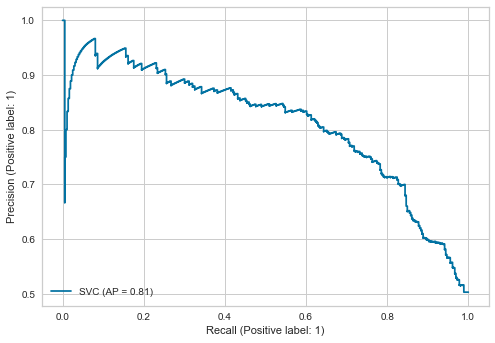

In [55]:
plot_precision_recall_curve(svc_p, X_test_p, y_test_p)

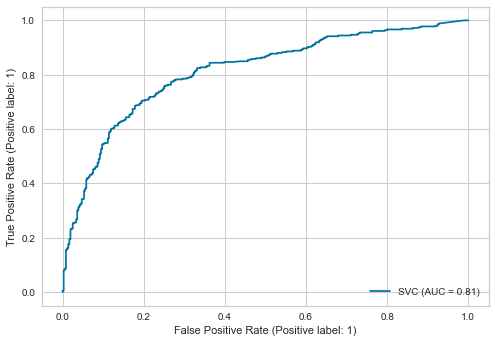

In [56]:
plot_roc_curve(svc_p,  X_test_p, y_test_p)

## 3.2 Nouns + Proper Nouns + Verbs + Adjectives + Pronouns + Subordinating Conjunction + Adpositions +  Coordinating Conjunctions + Other

In [57]:
tfidf_vectorizer_pos2 = TfidfVectorizer()

In [58]:
pos_list = ["NOUN","PROPN", "VERB", "ADJ", "PRON", "SCONJ", "ADP", "CCONJ", "X"] #NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X
data["NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X"] = data.apply(lambda x: filter_text_pos(x["POS_spacy"]), axis=1)

In [59]:
X_NounPropnVerb = tfidf_vectorizer_pos2.fit_transform(data["NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X"])
y_NounPropnVerb = data["label"]

In [60]:
X_over_n, y_over_n = undersample.fit_resample(X_NounPropnVerb, y_NounPropnVerb)

In [61]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_over_n, y_over_n, test_size=0.3, random_state=42, stratify=y_over_n)


Multinomoial Naive Bayes - NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X

              precision    recall  f1-score   support

           0       0.72      0.60      0.66       359
           1       0.66      0.77      0.71       359

    accuracy                           0.69       718
   macro avg       0.69      0.69      0.68       718
weighted avg       0.69      0.69      0.68       718

0.6852367688022284


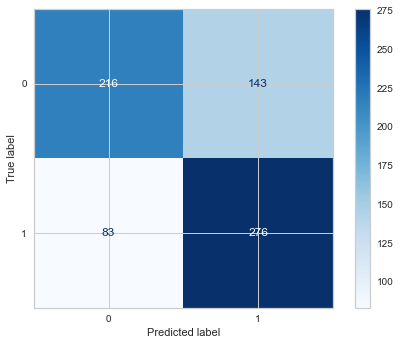

In [62]:
# Multinomial Naive Bayes
mnb_n = MultinomialNB(alpha=0.01)
mnb_n.fit(X_train_n, y_train_n)
y_mnb_n = mnb_n.predict(X_test_n)
as_mnb_n = accuracy_score(y_test_n, y_mnb_n)
f1s_mnb_n = f1_score(y_test_n, y_mnb_n, average= "macro")
prec_mnb_n = precision_score(y_test_n, y_mnb_n)
rec_mnb_n = recall_score(y_test_n, y_mnb_n, average='macro')
print("\nMultinomoial Naive Bayes - NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X\n")
plot_confusion_matrix(mnb_n, X_test_n, y_test_n, cmap="Blues")
#print(confusion_matrix(y_test_n, y_mnb_n))
print(classification_report(y_test_n, y_mnb_n))
print(accuracy_score(y_test_n, y_mnb_n))

[LibSVM]
Support Vector Machine - NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       359
           1       0.78      0.70      0.74       359

    accuracy                           0.75       718
   macro avg       0.75      0.75      0.75       718
weighted avg       0.75      0.75      0.75       718

0.7493036211699164


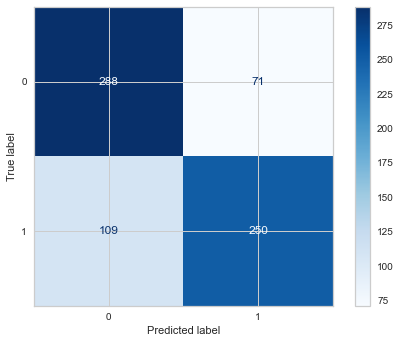

In [63]:
# Support Vector Machine
svc_n = SVC(verbose=10, random_state=42)
svc_n.fit(X_train_n, y_train_n)
y_svc_n = svc_n.predict(X_test_n)
as_svc_n = accuracy_score(y_test_n, y_svc_n)
f1s_svc_n = f1_score(y_test_n, y_svc_n, average="macro")
prec_svc_n = precision_score(y_test_n, y_svc_n)
rec_svc_n = recall_score(y_test_n, y_svc_n, average='macro')
print("\nSupport Vector Machine - NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X\n")
plot_confusion_matrix(svc_n, X_test_n, y_test_n, cmap="Blues")
#print(confusion_matrix(y_test_n, y_svc_n)
print(classification_report(y_test_n, y_svc_n))
print(accuracy_score(y_test_n, y_svc_n))


Logistic Regression - NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       359
           1       0.77      0.71      0.74       359

    accuracy                           0.75       718
   macro avg       0.75      0.75      0.75       718
weighted avg       0.75      0.75      0.75       718

0.7465181058495822


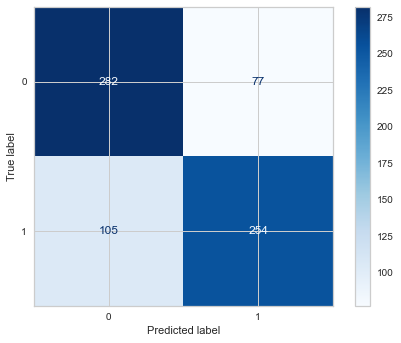

In [64]:
# Logistic
log_fit_n = LogisticRegression(random_state=42).fit(X_train_n, y_train_n)
y_log_n = log_fit_n.predict(X_test_n)
as_log_n = accuracy_score(y_test_n, y_log_n)
f1s_log_n = f1_score(y_test_n, y_log_n, average= "macro")
prec_log_n = precision_score(y_test_n, y_log_n)
rec_log_n = recall_score(y_test_n, y_log_n, average='macro')
print("\nLogistic Regression - NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X\n")
plot_confusion_matrix(log_fit_n, X_test_n, y_test_n, cmap="Blues")
#print(confusion_matrix(y_test_n, y_log_n))
print(classification_report(y_test_n, y_log_n))
print(accuracy_score(y_test_n, y_log_n))


Random Forest - NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X

              precision    recall  f1-score   support

           0       0.62      0.82      0.71       359
           1       0.74      0.50      0.60       359

    accuracy                           0.66       718
   macro avg       0.68      0.66      0.65       718
weighted avg       0.68      0.66      0.65       718

0.6629526462395543


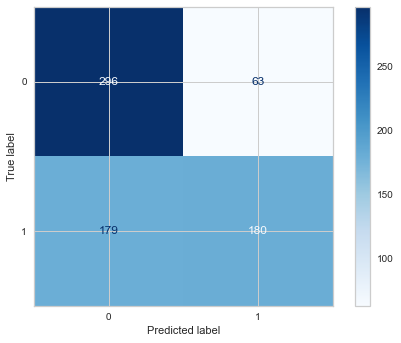

In [65]:
# Random Forest
rf_n = RandomForestClassifier(n_estimators=10, random_state=42)
rf_n.fit(X_train_n, y_train_n) 
y_rf_n = rf_n.predict(X_test_n)
as_rf_n = accuracy_score(y_test_n, y_rf_n)
f1s_rf_n = f1_score(y_test_n, y_rf_n, average= "macro")
prec_rf_n = precision_score(y_test_n, y_rf_n)
rec_rf_n = recall_score(y_test_n, y_rf_n, average='macro')
print("\nRandom Forest - NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X\n")
plot_confusion_matrix(rf_n, X_test_n, y_test_n, cmap="Blues")
#print(confusion_matrix(y_test_n, y_rf_n))
print(classification_report(y_test_n, y_rf_n))
print(accuracy_score(y_test_n, y_rf_n))


Decision Tree - NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X

              precision    recall  f1-score   support

           0       0.67      0.68      0.67       359
           1       0.67      0.66      0.67       359

    accuracy                           0.67       718
   macro avg       0.67      0.67      0.67       718
weighted avg       0.67      0.67      0.67       718

0.6713091922005571


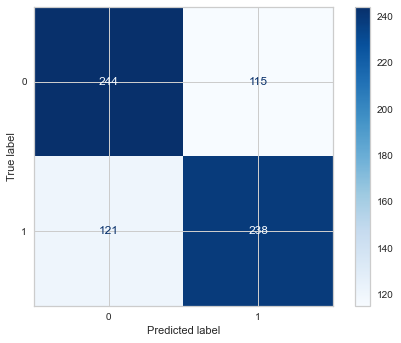

In [66]:
# Decision Tree
tree_n = DecisionTreeClassifier(random_state=42)
tree_n.fit(X_train_n, y_train_n)
y_tree_n = tree_n.predict(X_test_n)
as_tree_n = accuracy_score(y_test_n, y_tree_n)
f1s_tree_n = f1_score(y_test_n, y_tree_n, average= "macro")
prec_tree_n = precision_score(y_test_n, y_tree_n)
rec_tree_n = recall_score(y_test_n, y_tree_n, average='macro')
print("\nDecision Tree - NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X\n")
plot_confusion_matrix(tree_n, X_test_n, y_test_n, cmap="Blues")
#print(confusion_matrix(y_test_n, y_tree_n))
print(classification_report(y_test_n, y_tree_n))
print(accuracy_score(y_test_n, y_tree_n))

In [67]:
s1_n = pd.Series([as_mnb_n, as_svc_n, as_log_n, as_rf_n, as_tree_n], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s2_n = pd.Series([f1s_mnb_n, f1s_svc_n, f1s_log_n, f1s_rf_n, f1s_tree_n], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s3_n = pd.Series([prec_mnb_n, prec_svc_n, prec_log_n, prec_rf_n, prec_tree_n], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s4_n = pd.Series([rec_mnb_n, rec_svc_n, rec_log_n, rec_rf_n, rec_tree_n,], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
d_n = {'Accuracy Score' : s1_n, 'Precision Score': s3_n, 'Recall Score' : s4_n, 'F1 Score' : s2_n}
dfm_n = pd.DataFrame(d_n)
print("\nNOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X\n")
dfm_n.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'tomato', axis = 0)


NOUN_PROPN_VERB_ADJ_PRON_SCONJ_ADP_CCONJ_X



,Accuracy Score,Precision Score,Recall Score,F1 Score
Multinomial Naive Bayes,0.685237,0.658711,0.685237,0.683023
Support Vector Machine,0.749304,0.778816,0.749304,0.748599
Logistic Regression,0.746518,0.767372,0.746518,0.746132
Random Forest,0.662953,0.740741,0.662953,0.653919
Decision Tree,0.671309,0.674221,0.671309,0.671286


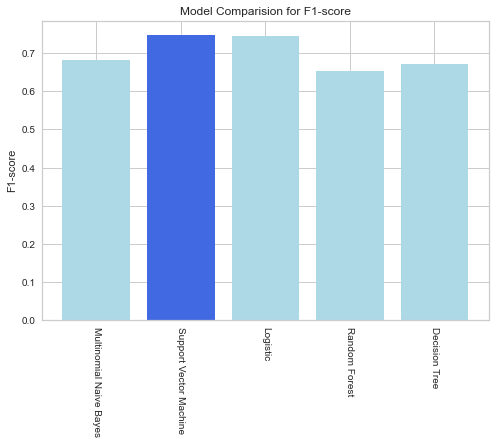

In [68]:
objects = ('Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic', 'Random Forest', 'Decision Tree')
y_pos = np.arange(len(objects))
performance = [f1s_mnb_n, f1s_svc_n, f1s_log_n, f1s_rf_n, f1s_tree_n]
clrs = ['lightblue' if (x < max(performance)) else 'royalblue' for x in performance ]
plt.bar(y_pos, performance, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('F1-score')
plt.title('Model Comparision for F1-score')
plt.show()

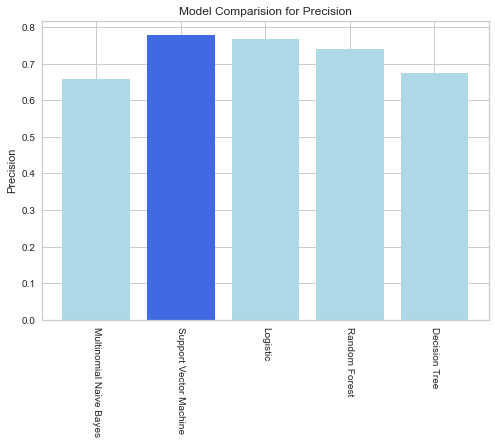

In [69]:
performance_prec = [prec_mnb_n, prec_svc_n, prec_log_n, prec_rf_n, prec_tree_n]
clrs = ['lightblue' if (x < max(performance_prec)) else 'royalblue' for x in performance_prec ]
plt.bar(y_pos, performance_prec, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('Precision')
plt.title('Model Comparision for Precision')
plt.show()

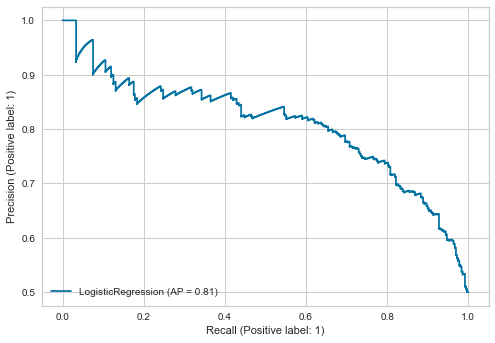

In [70]:
plot_precision_recall_curve(log_fit_n, X_test_n, y_test_n)

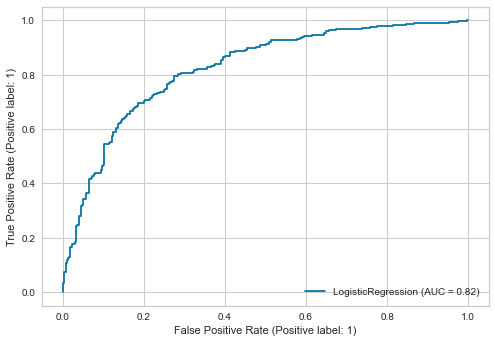

In [71]:
plot_roc_curve(log_fit_n,  X_test_n, y_test_n)

In [72]:
with open("serialized/vect_pos.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer_pos2, f)

with open("serialized/log_pos.pkl", "wb") as f:
    pickle.dump(log_fit_n, f)

## 4. POLARITY AS FEATURE

In [73]:
sentiment_analyzer = VS()
def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    features = [sentiment['neu'], sentiment['neg']]
    return features

In [74]:
def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

In [75]:
final_features = sentiment_analysis_array(data["lemmatized"])

In [76]:
scaler = MinMaxScaler()
final_features_scaled = scaler.fit_transform(final_features)

In [77]:
tfidf_vectorizer_pol = TfidfVectorizer()

In [78]:
tfidf_npvaad = tfidf_vectorizer_pol.fit_transform(data["text_clean"])
tfidf_a = tfidf_npvaad.toarray()
modelling_features = np.concatenate([tfidf_a,final_features_scaled],axis=1)
modelling_features.shape

(10570, 15112)

In [79]:
X_fe = pd.DataFrame(modelling_features)
y_fe = data["label"]
X_f, y_f = undersample.fit_resample(X_fe, y_fe)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, random_state=42, test_size=0.2)


Multinomoial Naive Bayes - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity

              precision    recall  f1-score   support

           0       0.74      0.62      0.68       236
           1       0.68      0.79      0.73       243

    accuracy                           0.71       479
   macro avg       0.71      0.70      0.70       479
weighted avg       0.71      0.71      0.70       479

0.7056367432150313


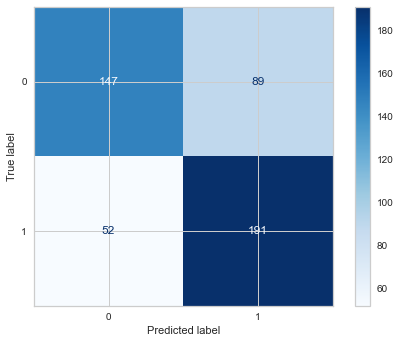

In [80]:
# Multinomial Naive Bayes
mnb_f = MultinomialNB(alpha=0.01)
mnb_f.fit(X_train_f, y_train_f)
y_mnb_f = mnb_f.predict(X_test_f)
as_mnb_f = accuracy_score(y_test_f, y_mnb_f)
f1s_mnb_f = f1_score(y_test_f, y_mnb_f, average= "macro")
prec_mnb_f = precision_score(y_test_f, y_mnb_f)
rec_mnb_f = recall_score(y_test_f, y_mnb_f, average='macro')
print("\nMultinomoial Naive Bayes - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity\n")
plot_confusion_matrix(mnb_f, X_test_f,y_test_f, cmap="Blues")
#print(confusion_matrix(y_test_f,y_mnb_f))
print(classification_report(y_test_f,y_mnb_f))
print(accuracy_score(y_test_f, y_mnb_f))

[LibSVM]
Support Vector Machine - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       236
           1       0.77      0.75      0.76       243

    accuracy                           0.76       479
   macro avg       0.76      0.76      0.76       479
weighted avg       0.76      0.76      0.76       479

0.7599164926931107


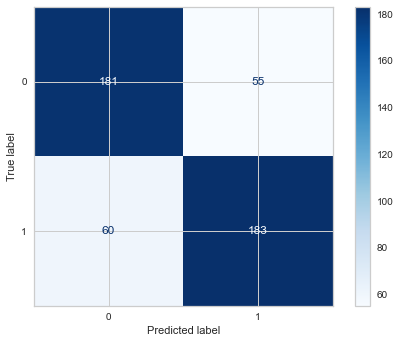

In [81]:
# Support Vector Machine
svc_f = SVC(verbose=10, random_state=42)
svc_f.fit(X_train_f, y_train_f)
y_svc_f = svc_f.predict(X_test_f)
as_svc_f = accuracy_score(y_test_f, y_svc_f)
f1s_svc_f = f1_score(y_test_f, y_svc_f, average="macro")
prec_svc_f = precision_score(y_test_f, y_svc_f)
rec_svc_f = recall_score(y_test_f, y_svc_f, average='macro')
print("\nSupport Vector Machine - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity\n")
plot_confusion_matrix(svc_f, X_test_f,y_test_f, cmap="Blues")
#print(confusion_matrix(y_test_f,y_svc_f)
print(classification_report(y_test_f,y_svc_f))
print(accuracy_score(y_test_f, y_svc_f))


Logistic Regression - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       236
           1       0.77      0.73      0.75       243

    accuracy                           0.75       479
   macro avg       0.75      0.75      0.75       479
weighted avg       0.75      0.75      0.75       479

0.7536534446764092


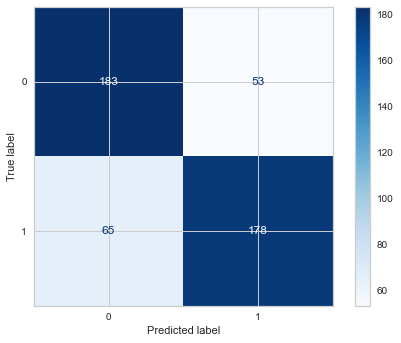

In [82]:
# Logistic
log_fit_f = LogisticRegression(random_state=42).fit(X_train_f, y_train_f)
y_log_f = log_fit_f.predict(X_test_f)
as_log_f = accuracy_score(y_test_f, y_log_f)
f1s_log_f = f1_score(y_test_f, y_log_f, average= "macro")
prec_log_f = precision_score(y_test_f, y_log_f)
rec_log_f = recall_score(y_test_f, y_log_f, average='macro')
print("\nLogistic Regression - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity\n")
plot_confusion_matrix(log_fit_f, X_test_f,y_test_f, cmap="Blues")
#print(confusion_matrix(y_test_f,y_log_f))
print(classification_report(y_test_f,y_log_f))
print(accuracy_score(y_test_f, y_log_f))


Random Forest - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity

              precision    recall  f1-score   support

           0       0.66      0.78      0.71       236
           1       0.73      0.60      0.66       243

    accuracy                           0.69       479
   macro avg       0.70      0.69      0.69       479
weighted avg       0.70      0.69      0.69       479

0.6889352818371608


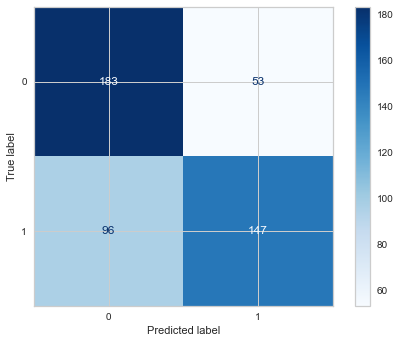

In [83]:
# Random Forest
rf_f = RandomForestClassifier(n_estimators=10, random_state=42)
rf_f.fit(X_train_f, y_train_f) 
y_rf_f = rf_f.predict(X_test_f)
as_rf_f = accuracy_score(y_test_f, y_rf_f)
f1s_rf_f = f1_score(y_test_f, y_rf_f, average= "macro")
prec_rf_f = precision_score(y_test_f,y_rf_f)
rec_rf_f = recall_score(y_test_f, y_rf_f, average='macro')
print("\nRandom Forest - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity\n")
plot_confusion_matrix(rf_f, X_test_f ,y_test_f, cmap="Blues")
#print(confusion_matrix(y_test_f,y_rf_f))
print(classification_report(y_test_f ,y_rf_f))
print(accuracy_score(y_test_f, y_rf_f))


Decision Tree - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity

              precision    recall  f1-score   support

           0       0.64      0.65      0.64       236
           1       0.65      0.64      0.65       243

    accuracy                           0.65       479
   macro avg       0.65      0.65      0.65       479
weighted avg       0.65      0.65      0.65       479

0.6450939457202505


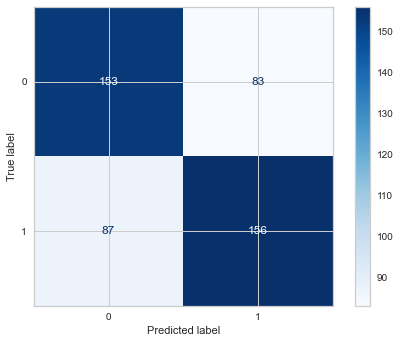

In [84]:
# Decision Tree
tree_f = DecisionTreeClassifier(random_state=42)
tree_f.fit(X_train_f, y_train_f)
y_tree_f = tree_f.predict(X_test_f)
as_tree_f = accuracy_score(y_test_f, y_tree_f)
f1s_tree_f = f1_score(y_test_f, y_tree_f, average= "macro")
prec_tree_f = precision_score(y_test_f, y_tree_f)
rec_tree_f = recall_score(y_test_f, y_tree_f, average='macro')
print("\nDecision Tree - NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity\n")
plot_confusion_matrix(tree_f, X_test_f, y_test_f, cmap="Blues")
#print(confusion_matrix(y_test_f,y_tree_f))
print(classification_report(y_test_f,y_tree_f))
print(accuracy_score(y_test_f, y_tree_f))

In [85]:
s1_f = pd.Series([as_mnb_f, as_svc_f, as_log_f, as_rf_f, as_tree_f], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s2_f = pd.Series([f1s_mnb_f, f1s_svc_f, f1s_log_f, f1s_rf_f,  f1s_tree_f], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s3_f = pd.Series([prec_mnb_f, prec_svc_f, prec_log_f, prec_rf_f, prec_tree_f], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
s4_f = pd.Series([rec_mnb_f, rec_svc_f, rec_log_f, rec_rf_f, rec_tree_f], index=['Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic Regression', 'Random Forest', 'Decision Tree'])
d_f = {'Accuracy Score' : s1_f, 'Precision Score': s3_f, 'Recall Score' : s4_f, 'F1 Score' : s2_f}
dfm_f = pd.DataFrame(d_f)
print("\nNOUN_PROPN_VERB_ADJ_ADV_DET with Polarity\n")
dfm_f.style.highlight_max(color = 'lightgreen', axis = 0).highlight_min(color = 'tomato', axis = 0)


NOUN_PROPN_VERB_ADJ_ADV_DET with Polarity



,Accuracy Score,Precision Score,Recall Score,F1 Score
Multinomial Naive Bayes,0.705637,0.682143,0.704445,0.703132
Support Vector Machine,0.759916,0.768908,0.760018,0.759912
Logistic Regression,0.753653,0.770563,0.753967,0.753627
Random Forest,0.688935,0.735000,0.690181,0.687168
Decision Tree,0.645094,0.652720,0.645140,0.645080


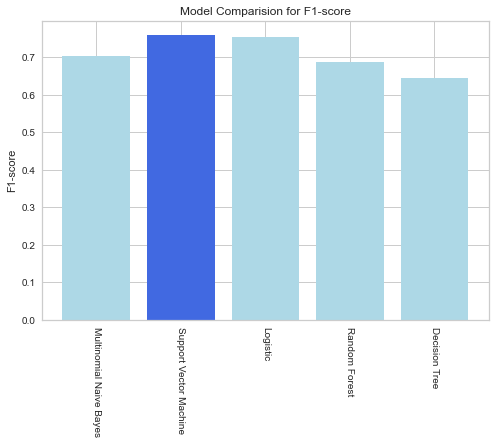

In [86]:
objects = ('Multinomial Naive Bayes', 'Support Vector Machine', 'Logistic', 'Random Forest', 'Decision Tree')
y_pos = np.arange(len(objects))
performance_f1 = [f1s_mnb_f, f1s_svc_f, f1s_log_f, f1s_rf_f, f1s_tree_f]
clrs = ['lightblue' if (x < max(performance_f1)) else 'royalblue' for x in performance_f1 ]
plt.bar(y_pos, performance_f1, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('F1-score')
plt.title('Model Comparision for F1-score')
plt.show()

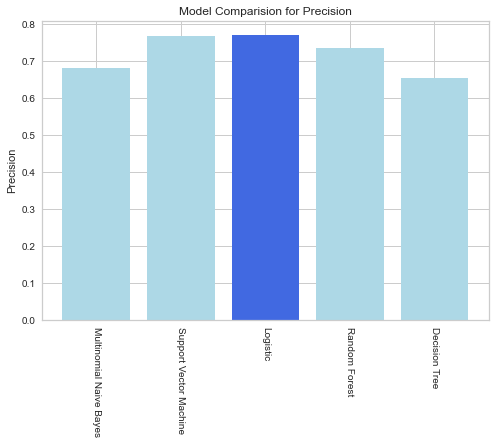

In [87]:
performance_prec = [prec_mnb_f, prec_svc_f, prec_log_f, prec_rf_f, prec_tree_f]
clrs = ['lightblue' if (x < max(performance_prec)) else 'royalblue' for x in performance_prec ]
plt.bar(y_pos, performance_prec, align='center', alpha=1, color=clrs)
plt.xticks(y_pos, objects, rotation=270)
plt.ylabel('Precision')
plt.title('Model Comparision for Precision')
plt.show()

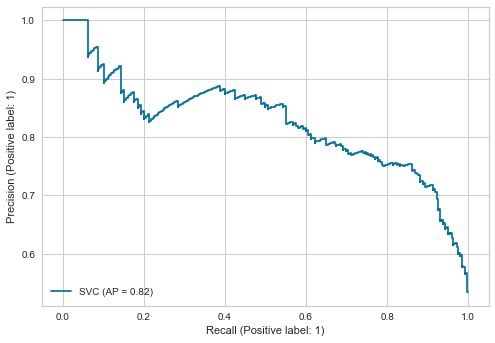

In [88]:
plot_precision_recall_curve(svc_f, X_test_f, y_test_f)

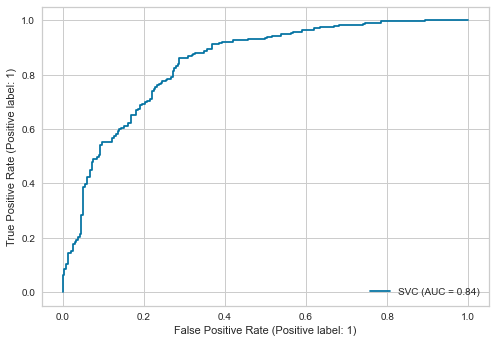

In [89]:
plot_roc_curve(svc_f,  X_test_f, y_test_f)

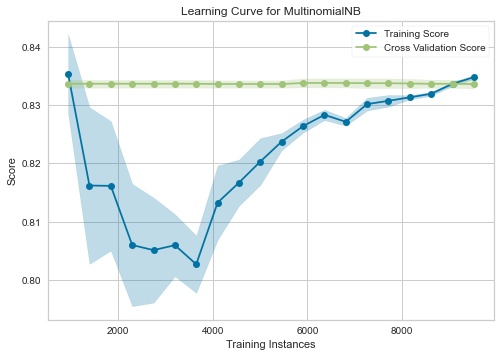

<AxesSubplot:title={'center':'Learning Curve for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [90]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.datasets import load_game
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.1, 1, 20 )

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

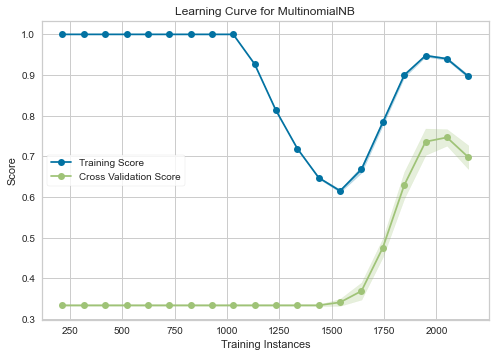

<AxesSubplot:title={'center':'Learning Curve for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [91]:
# Learning curve
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.1, 1, 20 )

model = MultinomialNB()
visualizer = LearningCurve(model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4)

visualizer.fit(X_under, y_under)
visualizer.show()

# HATE SPEECH CLASSIFICATION

In [92]:
def expand_contractions(text):
    cList = {
        "n't": " not",
        "/TD": " ",
        " PM ": " personal message ",
        " pm ": " personal message ",
        "PM ": "personal message ",
        " Donot ": " do not ",
        " MB ": " megabytes ",
        "I'm" : "I am",
        " 've " : " have ",
        " 're " : " are ",
        " 'll " : " will "
    }
    
    c_re = re.compile("(%s)" % "|".join(cList.keys()))

    return c_re.sub(lambda match: cList[match.group(0)], text)

In [93]:
def full_text_clean(text):
    aa = expand_contractions(text)
    
    bb = pproc.clean(
        clean(pproc.clean(aa),
              fix_unicode=True,              
              to_ascii=True,                  
              lower=True,                     
              no_line_breaks=True,           
              no_urls=True,                  
              no_emails=True,                
              no_phone_numbers=False,         
              no_numbers=False,               
              no_digits=False,                
              no_currency_symbols=False,      
              no_punct=True,                 
              replace_with_url=" ",
              replace_with_email=" ",
        )
    )
    
    swords = string.punctuation
    
    cc = (
        bb.lower()
        .replace(r"(@[a-z0-9]+)\w+", " ")
        .replace(r"www\S+", " ")
        .replace(r"com/watch", " ")
        .replace(r"\S*[.,:;!?-]\S*[^\s\.,:;!?-]", " ")
        .replace(r" th ", " ")
        .replace(r"\w*\d\w*", " ")
        .replace(r"rlm", " ")
        .replace(r"pttm", " ")
        .replace(r"ghlight", " ")
        .replace(r"[0-9]+(?:st| st|nd| nd|rd| rd|th| th)", " ")
        .replace(r"([^a-z \t])", " ")
        .replace(r" +", " ")
        .replace(r"http", " ")
        )
    
    cc = " ".join([i for i in cc.split() if not i in swords])
    
    return cc

In [94]:
def hate_predict(X, vect, clf):
    lista_pulita = [full_text_clean(text) for text in X]
    X_new = vect.transform(lista_pulita)
    classification = clf.predict(X_new)
    return classification

In [95]:
#with open("serialized/vect.pkl", "rb") as f:
#    vect = pickle.load(f)

In [96]:
written_unders = "I hate all of you"
under_s_ = hate_predict([written_unders], tfidf_vectorizer, svc_i)
under_s_

array([0], dtype=int64)

In [97]:
written_pos = "I hate all of you"
pos_ = hate_predict([written_pos], tfidf_vectorizer_pos2, log_fit_n)
pos_

array([1], dtype=int64)